# СБОРНЫЙ ПРОЕКТ "ОЦЕНКА УСПЕШНОСТИ КОМПЬЮТЕРНЫХ ИГР"

> ## Цель проекта: 
Выявление закономерностей, определяющих успешность компьютерной игры для планирования рекламных компаний

> ## Задачи проекта:
- Подготовить данные,
- Провести исследовательский анализ данных,
- Составить портрет потенциального пользователя из каждого региона на основе полученных данных,
- Сформулировать и проверить гипотезы,
- Сделать выводы

##  Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='5'>Изменение регистра в названиях столбцов</a>
- <a id='7'>Проверка на наличие пропусков, создание тепловой карты пропусков</a>
- <a id='11'>Замена пропусков. Приведение к корректным типам данных</a>
- <a id='31'>Подсчет суммарных продаж во всех регионах</a>
- <a id='33'>Исследовательский анализ данных</a>
- <a id='34'>Работа с гистограммами</a>
- <a id='37'>Анализ по срезу 2012 года</a>
- <a id='44'>Работа с графиками</a>
- <a id='46'>Работа с гистограммами размаха</a>
- <a id='48'>Работа с гистограммами рассеяния и корреляцией</a>
- <a id='54'>Распределение игр по продажам</a>
- <a id='55'>Формирование портрета пользователя</a>
- <a id='60'>Проверка гипотез</a>
- <a id='70'>Общий вывод</a>

## Подготовка данных

### Импорт необходимых библиотек, чтение и подготовка датасета, определение пропусков

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
from scipy import stats as st

<span style=color:red><b>Чтение датасета, вывод выборочных данных, вывод описательных статистик </b></span>

In [2]:
# Читаем датасет
df=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/games.csv')

In [3]:
# Выводим sample
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1296,Fight Night Round 3,X360,2006.0,Fighting,1.33,0.03,0.01,0.10,86.0,8.8,T
4341,Bee Movie Game,DS,2007.0,Action,0.41,0.00,0.00,0.03,58.0,tbd,E
13913,Klonoa Heroes: Densetsu no Star Medal,GBA,2002.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13583,Top Gun,DS,2006.0,Simulation,0.04,0.00,0.00,0.00,48.0,tbd,E10+
6623,Final Fantasy Crystal Chronicles: Echoes of Time,Wii,2009.0,Role-Playing,0.13,0.06,0.05,0.02,64.0,5.6,E10+
7519,EVE Online,PC,2003.0,Role-Playing,0.00,0.19,0.00,0.01,69.0,7.5,T
10470,Who Wants to Be a Millionaire: 3rd Edition,Wii,2010.0,Misc,0.10,0.00,0.00,0.01,NaN,tbd,E
504,Syphon Filter,PS,1999.0,Shooter,2.03,0.72,0.02,0.11,NaN,NaN,NaN
1368,The Sims 3,Wii,2010.0,Simulation,0.57,0.69,0.00,0.14,NaN,2.5,T
7944,Phantasy Star Nova,PSV,2014.0,Role-Playing,0.00,0.00,0.19,0.00,NaN,NaN,NaN


In [4]:
# Выводим данные описательной статистики
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


____


<span style=color:red><b>Изменение регистра в названиях столбцов </b></span>

In [5]:
# Изменяем регистр в названиях столбцов
df.columns=df.columns.str.lower()

In [6]:
# Проверяем изменения
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


___

<span style=color:red><b>Проверка на наличие пропусков, создание тепловой карты пропусков, вывод общей информации </b></span>

In [7]:
# Проверяем датасет на наличие пропусков
df.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [8]:
# Определяем процентное соотношение пропусков
df.isnull().sum().sort_values()/df.shape[0]*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

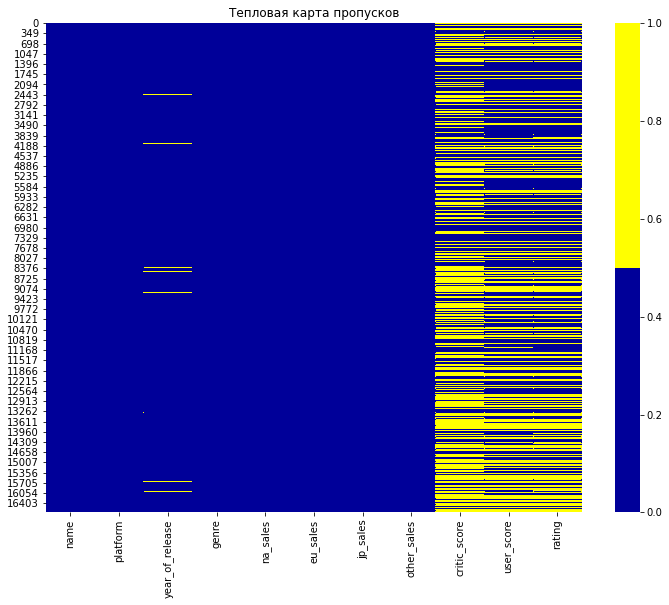

In [9]:
# Создаем тепловую карту пропущенных значений
plt.figure(figsize=(12, 9))
plt.title('Тепловая карта пропусков')
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [10]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<span style=color:red><b>Промежуточные выводы: </b></span>
- В датасете много пропущенных данных.
- Пропуски в столбцах critic_score, user_score и rating достигают 40%, 40,5% и 51% соответственно.
- Пропуски в столбце year_of_release - 1,6%.
- Данные в столбце  user_score не вошли в описательные статистики по причине того, что представляют собой object, хотя являются численными.
- Данные в столбце year_of_release необходимо привести к стандартному значению даты 



<span style=color:red><b>Обсуждение. Стратегия дальнейших действий: </b></span>


<b>Что делать с пропущенными значениями в столбце user_score:</b> 
- Значения определенно необходимо привести к float, поскольку это требует логика дальнейшего анализа,
- Кроме того, в данном столбце присутствует <b>TBD</b> - специальное обозначение, используемое тогда, когда на игру написано слишком мало отзывов для формирования рейтинга. Возможно, это связано с тем, что данная игра популярна в стране (странах), в которых пользователи не способны писать полноценные отзывы на английском языке, скажем в РФ, СНГ или, например, Японии. То есть, фактический рейтинг игры может быть высоким, но это не будет отражено в официальных мировых рейтингах,
- Таким образом, TBD можно приравнять к NaN, 
- Для пропущенных значений в столбцах 'user_score' и 'critic_score' можно использовать -1, поскольку 0 также является величиной рейтинга.


<b>Что делать с пропусками в critic_score и rating:</b>
- Пропуски в critic_score тоже можно заменить на "индикаторное значение" (-1),
- Судя по всему critic_score стоит привести к типу int,
- NaN в столбце rating заменять на численные значения бессмысленно. Можно изменить, например, на no_rating

<b>Что делать с пропусками в year_of_release:</b>
- Пропусков в данном столбце немного, однако они присутствуют. Заполнить пропуски средним, медианой и т.д. не получится,
- Можно просто пойти по пути наименьшего сопротивления и удалить пропуски, благо 1,6% не повлияют на анализ существенным образом


<b>Что делать с пропусками в name и genre:</b>
- Пропусков в данных столбцах совсем мало - 0,01%
- Вполне можно заменить на no_name и no_genre соответственно либо просто удалить.

In [11]:
# Можно использовать для анализа данных по каждому столбцу метод value_counts()...
# Можно, для разнообразия, написать функцию...
def count (df, columns):
    return df[columns].apply(pd.value_counts)

In [12]:
print(count(df, ['genre']))

              genre
Action         3369
Sports         2348
Misc           1750
Role-Playing   1498
Shooter        1323
Adventure      1303
Racing         1249
Platform        888
Simulation      873
Fighting        849
Strategy        683
Puzzle          580


In [13]:
print(count(df, ['rating']))

      rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1


In [14]:
print(count(df, ['platform']))

      platform
PS2       2161
DS        2151
PS3       1331
Wii       1320
X360      1262
PSP       1209
PS        1197
PC         974
XB         824
GBA        822
GC         556
3DS        520
PSV        430
PS4        392
N64        319
XOne       247
SNES       239
SAT        173
WiiU       147
2600       133
GB          98
NES         98
DC          52
GEN         29
NG          12
SCD          6
WS           6
3DO          3
TG16         2
GG           1
PCFX         1


In [15]:
print(count(df, ['critic_score']))

      critic_score
70.0           256
71.0           254
75.0           245
78.0           240
73.0           238
...            ...
20.0             3
17.0             1
22.0             1
13.0             1
21.0             1

[82 rows x 1 columns]


In [16]:
# Выводим отсортированный список
print(sorted(df['critic_score'].unique()))

[76.0, nan, 13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0]


In [17]:
print(count(df, ['user_score']))

     user_score
tbd        2424
7.8         324
8           290
8.2         282
8.3         254
..          ...
0.3           2
1.3           2
0.5           2
9.7           1
0             1

[96 rows x 1 columns]


In [18]:
# Исследуем TBD в столбце 'user_score'
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [19]:
print('TBD встречается в {:.0f} строках'.format(len(df[df['user_score'] == 'tbd'])))

TBD встречается в 2424 строках


In [20]:
print('Количество игр на разных платформах:', len(df['name'].unique()))

Количество игр на разных платформах: 11560


In [21]:
# Проверяем совпадения пропущенных значений в столбце 'name'...
df['name'].isnull().sum()

2

In [22]:
#... и в столбце 'genre'
df['genre'].isnull().sum()

2

Судя по всему, пропуски не случайны...

In [23]:
# Замена TBD на NaN в user_score
# Приведение к float
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

In [24]:
# Замена NaN на (-1) в critic_score
# Приведение к int
df['critic_score']=df['critic_score'].fillna(-1)
df['critic_score']=df['critic_score'].astype('int')

In [25]:
# Замена NaN в столбце year_of_release
# Приведение значений к типу (int)
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release']=df['year_of_release'].astype(int)

In [26]:
# Замена NaN на no_rating в столбце rating
# Замена NaN на no_name в столбце name
# Замена NaN на no_genre в столбце genre
df['rating']=df['rating'].fillna('no_rating')
df['name']=df['name'].fillna('no_name')
df['genre']=df['genre'].fillna('no_genre')

In [27]:
# Проверяем датасет на пропуски
print('Количество пропусков в столбце user_score - {}'.format(df['user_score'].isnull().sum()))
print('Количество пропусков в столбце critic_score - {}'.format(df['critic_score'].isnull().sum()))
print('Количество пропусков в столбце rating - {}'.format(df['rating'].isnull().sum()))
print('Количество пропусков в столбце name - {}'.format(df['name'].isnull().sum()))
print('Количество пропусков в столбце genre - {}'.format(df['genre'].isnull().sum()))
print('Количество пропусков в столбце year_of_release - {}'.format(df['year_of_release'].isnull().sum()))

Количество пропусков в столбце user_score - 8983
Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце rating - 0
Количество пропусков в столбце name - 0
Количество пропусков в столбце genre - 0
Количество пропусков в столбце year_of_release - 0


In [28]:
# Выводим sample(10)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1447,Devil May Cry 4,X360,2008,Action,0.79,0.34,0.08,0.13,84,8.0,M
4539,Remington Great American Bird Hunt,Wii,2009,Sports,0.40,0.00,0.00,0.03,-1,NaN,T
1704,Mario vs. Donkey Kong 2: March of the Minis,DS,2006,Puzzle,0.73,0.03,0.36,0.07,76,7.9,E
3871,Cars 2,PS3,2011,Racing,0.22,0.21,0.00,0.09,-1,NaN,no_rating
4401,50 Cent: Bulletproof,XB,2005,Action,0.33,0.10,0.00,0.02,50,5.9,M
932,Shrek 2,PS2,2004,Platform,1.12,0.69,0.03,0.02,71,8.5,E
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97,8.9,E
4328,Pokemon Puzzle League,N64,2000,Puzzle,0.36,0.08,0.00,0.01,-1,NaN,no_rating
2694,Doom (2016),XOne,2016,Shooter,0.44,0.25,0.00,0.07,-1,NaN,no_rating
1583,Saints Row IV,PS3,2013,Action,0.56,0.41,0.09,0.19,76,6.3,M


In [29]:
# Выводим общую информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [30]:
# Проверка дубликатов
df.duplicated().sum()

0

<span style=color:red><b>Промежуточные выводы: </b></span>
- Данные приведены к корректным типам
- Пропуски заполнены и/ или удалены
- Дубликаты отсутствуют

___

### Подсчет суммарных продаж во всех регионах

In [31]:
# Создаем новый столбец total_sales с суммарными продажами по всем регионам
df['total_sales']=df['na_sales']+ df['eu_sales']+ df['jp_sales'] + df['other_sales']

In [32]:
# Выводим новый датасет
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,no_rating,28.31


### Выводы:

- Датасет открыт и прочитан,
- Обнаружены многочисленные пропуски в некоторых столбцах,
- Пропуски заменены и/или удалены,
- Данные в столбцах приведены к корректным типам,
- Добавлен новый столбец  по суммарным продажам по всем регионам 'total_sales'

___

##  Исследовательский анализ данных

### Работа с гистограммами

In [33]:
# Создаем функцию для построения гистограмм
def hists(groupby_column, func, y='name'):
    plt.style.use('seaborn-deep')
    df_to_plot = df.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_summed = df_to_plot.count()
        figsize = (15,7)
        plot = df_to_plot_summed.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_summed = df_to_plot.sum().sort_values()
        figsize = (15,8)
        plot = df_to_plot_summed.plot(kind='barh', y=y, figsize=figsize, ec='black')
        

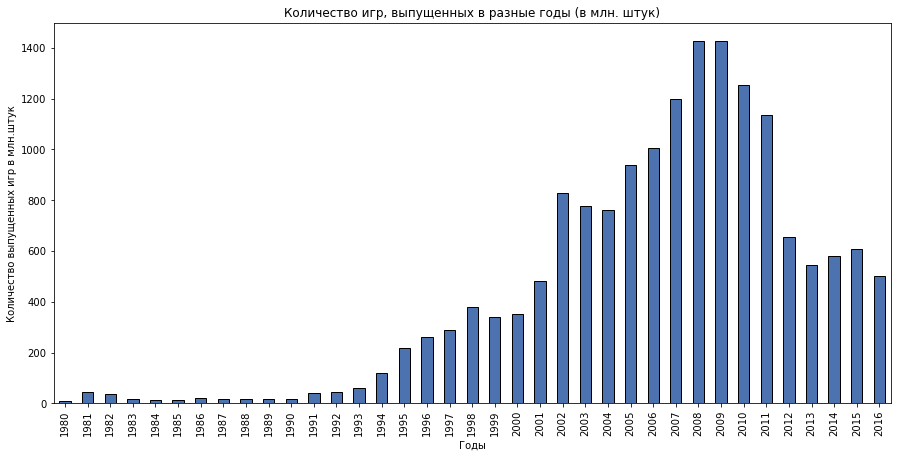

In [34]:
# Гистограмма  выпуска игр по годам
hists('year_of_release', 'count')
plt.title('Количество игр, выпущенных в разные годы (в млн. штук)')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр в млн.штук')
plt.show()

<b>Общие наблюдения:</b>
До 2002 года рынок игр развивался сообразно росту вычислительных мощностей. С 2002 года начался бурный рост игр с пиком в 2008 - 2009 годах. Потом начался спад, вызванный сменой фокуса интереса аудитории: пользователи начали активно использовать мобильные платформы... Важными для анализа являются годы, начиная с 2008. Анализ проводим по срезу от 2012 года.

___

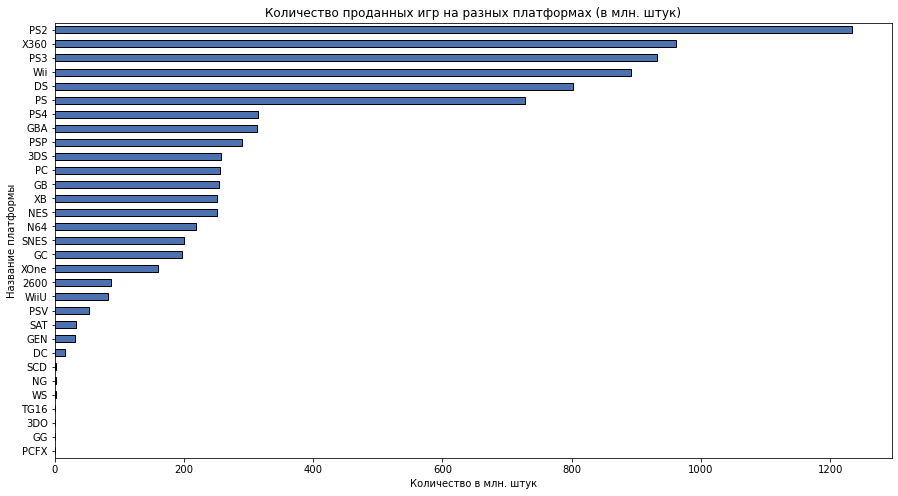

In [35]:
# Гистограмма количества проданных платформ
hists('platform', 'sum', 'total_sales')
plt.title('Количество проданных игр на разных платформах (в млн. штук)')
plt.xlabel('Количество в млн. штук')
plt.ylabel('Название платформы')
plt.show()

<b>Общие наблюдения:</b>
Наибольшее количество игр было продано на платформах PS3, X360 и PS2. Наименьшее - на локальных продуктах, произведенных для местных рынков в Китае и/ или Японии.

___

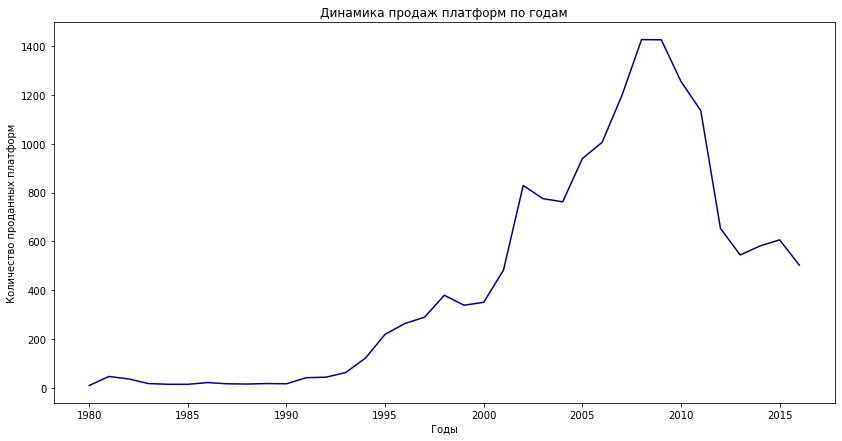

In [36]:
# Динамика продаж платформ по годам
df.groupby('year_of_release').agg({'platform':'count'}).sort_values(by='year_of_release')\
.plot(figsize = (14,7), color='navy',legend=False)
plt.title('Динамика продаж платформ по годам')
plt.xlabel('Годы')
plt.ylabel('Количество проданных платформ')
plt.show()

График подтверждает предположение о том, что пик развития индустрии пришелся на 2008 - 2009 годы. Предшествующий период на анализ влиять не будет. Однако, для максимально объективного анализа следует сузить временной интервал: анализ нужно проводить по срезу, начиная с 2012 - 2013 годов.

___

### Анализ по срезу от 2012 года

In [37]:
# Создаем новый датафрейм
new_df = df.query('year_of_release >= 2012')

In [38]:
# Выводим
new_df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9968,Armored Core: Verdict Day,PS3,2013,Simulation,0.00,0.00,0.12,0.00,66,7.4,T,0.12
15530,Downtown Nekketsu Jidaigek,3DS,2015,Action,0.00,0.00,0.02,0.00,-1,NaN,no_rating,0.02
14382,Onna no Ko to Misshitsu ni Itara **shichau Kam...,3DS,2012,Adventure,0.00,0.00,0.03,0.00,-1,NaN,no_rating,0.03
1952,Skylanders Giants,PS3,2012,Action,0.36,0.49,0.00,0.20,77,6.3,E10+,1.05
8048,Syndicate,X360,2012,Shooter,0.10,0.06,0.00,0.02,74,7.1,M,0.18
9086,Metal Gear Solid V: Ground Zeroes,X360,2014,Action,0.07,0.05,0.01,0.01,-1,5.7,M,0.14
16219,Fuuraiki 3,PSV,2015,Action,0.00,0.00,0.01,0.00,-1,NaN,no_rating,0.01
6656,Anno 2205,PC,2015,Strategy,0.02,0.22,0.00,0.02,72,5.9,E10+,0.26
7113,Guitar Hero Live,X360,2015,Misc,0.13,0.08,0.00,0.02,-1,5.5,T,0.23
16371,Chaos;Head Noah,PSV,2014,Adventure,0.00,0.00,0.01,0.00,-1,NaN,no_rating,0.01


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   int64  
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 293.1+ KB


In [40]:
# Создаем список из топ-6 игровых платформ
platforms = new_df.groupby('platform')['total_sales'].sum()\
.to_frame('total_sales').sort_values(by='total_sales', ascending=False)

In [41]:
# Выводим по индексу
top_platforms= platforms.head(6).index

In [42]:
print(top_platforms)

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU'], dtype='object', name='platform')


In [43]:
top_platforms=['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU']

___

### Работа с графиками

In [44]:
# Функция для построения графиков
def lines(platforms=None, query=None):
    plt.style.use('seaborn-deep') 
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = df['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = df.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = df.query('platform == @platform')
        else:
            df_to_plot = df.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['total_sales']\
        .sum().plot(x='год выпуска', y='глобальные продажи', style='-', kind='line', fontsize=10, 
                    linewidth=2, label=platform, ax=ax, figsize=(15,8))
        legend_list.append(platform)
    
    ax.set_xlabel('Годы выпуска')
    ax.set_ylabel('Продажи (млн. штук)')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

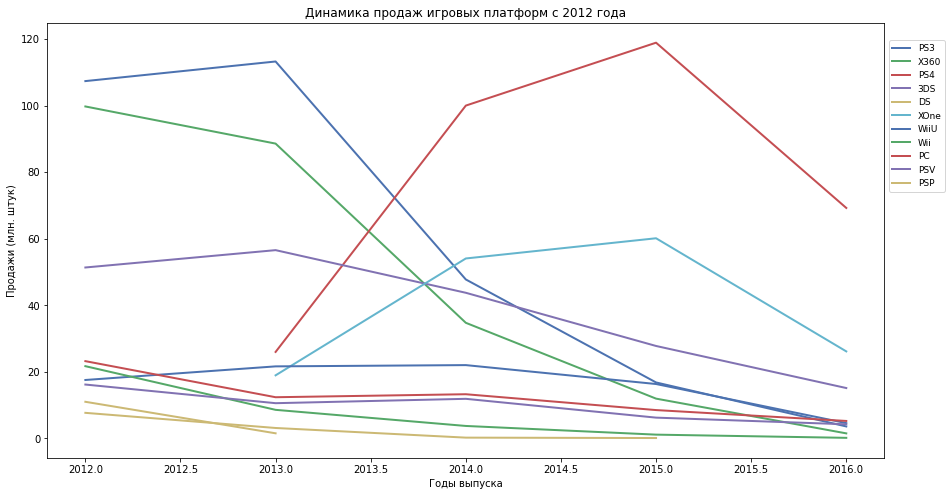

In [45]:
# Вывод динамики продаж по актуальным годам
lines(query='year_of_release >= 2012')
plt.title('Динамика продаж игровых платформ с 2012 года')
plt.show()

<b>Общие наблюдения:</b>
- Пик продаж по PS4 и XOne приходятся на 2015 год. 
- Пик продаж по PS3, X360, PSV - на 2013 год.

In [46]:
# Функция для построения диаграмм размаха
def boxplot(title=None, query_condition = None, ylims=None):
    if query_condition == None:
        ax = new_df.boxplot(column='total_sales', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=2),
                                         medianprops=dict(linestyle='-', linewidth=2),
                                         whiskerprops=dict(linestyle='-', linewidth=2),
                                         capprops=dict(linestyle='-', linewidth=2), 
                                         notch=True)
    else:
        new_df_query = new_df.query(query_condition)
        by_column = query_condition.split()[0]
        ax = new_df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=2),
                                         medianprops=dict(linestyle='-', linewidth=2),
                                         whiskerprops=dict(linestyle='-', linewidth=2),
                                         capprops=dict(linestyle='-', linewidth=2),
                                         notch=True)
        ax.set_xlabel('Топ-6 игровых платформ')
        ax.set_ylabel('Суммарные продажи (млн.долларов)')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25)

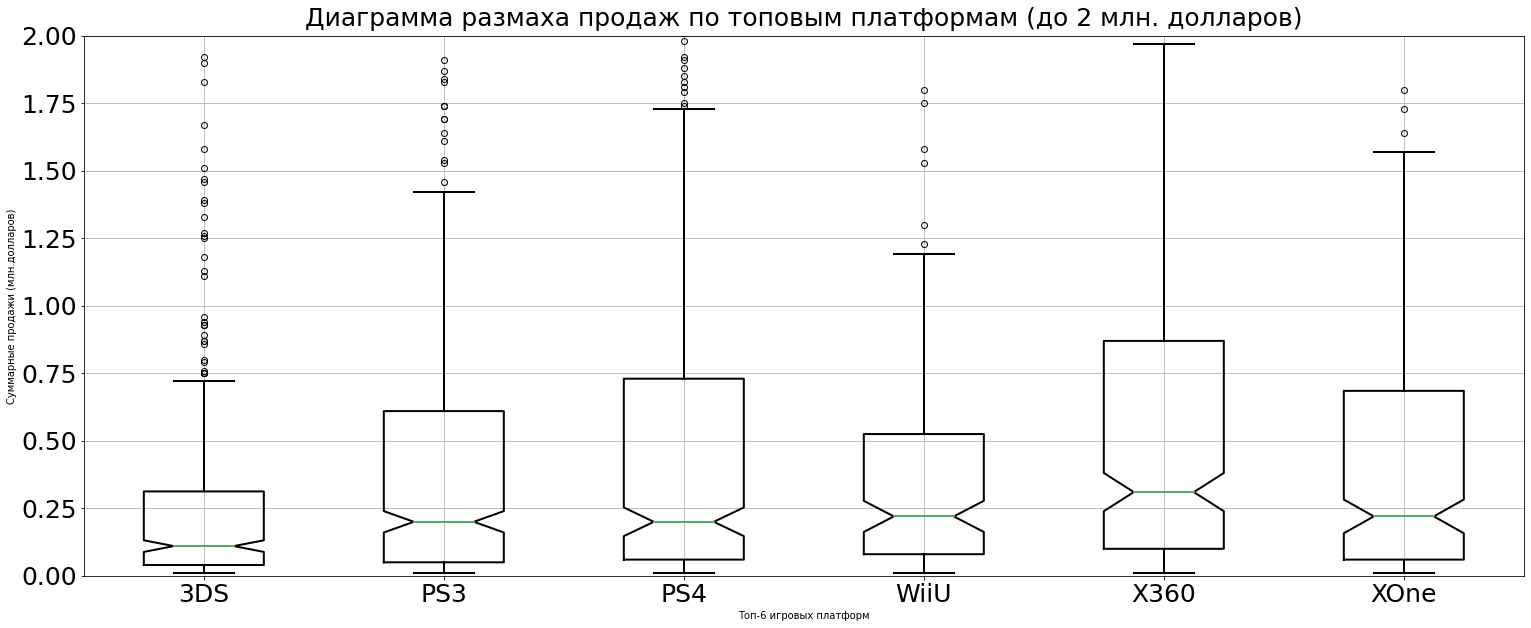

In [47]:
# Создаем диаграмму размаха по топовым платформам (до 2 млн. долларов)
boxplot('Диаграмма размаха продаж по топовым платформам (до 2 млн. долларов)',\
        query_condition='platform in @top_platforms',ylims=[0,2])

<b>Общие наблюдения:</b>
- Медианы для всех платформ (кроме 3DS < 0,2 млн. долларов) расположены в районе 0,2 - 0,25 млн. долларов прибыли; медиана Х360 - в районе 0,3 млн. долларов,
- Верхняя граница для X360 - чуть меньше 2 мнл. долларов,
- Верхняя граница для PS4 - порядка 1,7 млн. долларов,
- Верхняя граница XOne - более 1,5 млн. долларов,
- Верхняя граница для остальных платформ - менее 1,5 млн. долларов.

Наиболее популярной платформой, исходя из диаграммы, является Х360. Оцениваем ее...

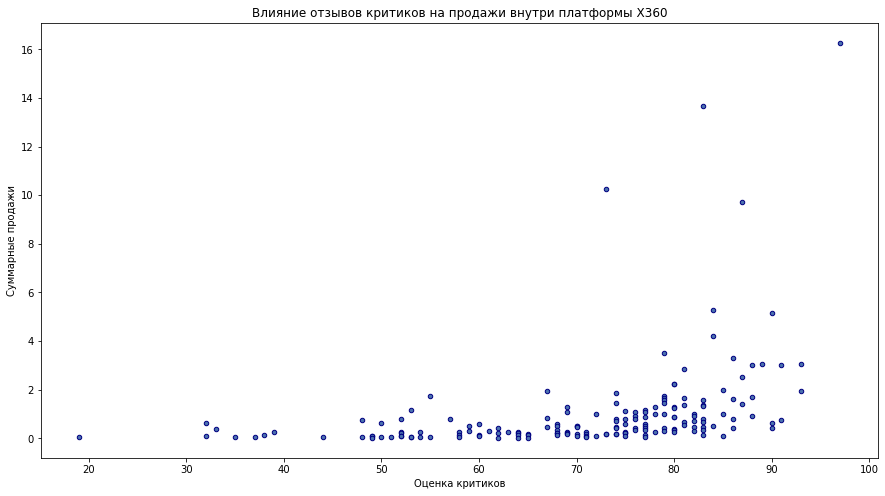

In [48]:
# Создание диаграммы рассеяния по Х360 по отзывам критиков
df_x360 = new_df[(new_df['platform'] == 'X360') & (new_df['critic_score'] > 0)]
df_x360.plot(kind='scatter', x='critic_score', y='total_sales', ec='navy', figsize=(15,8))
plt.title('Влияние отзывов критиков на продажи внутри платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

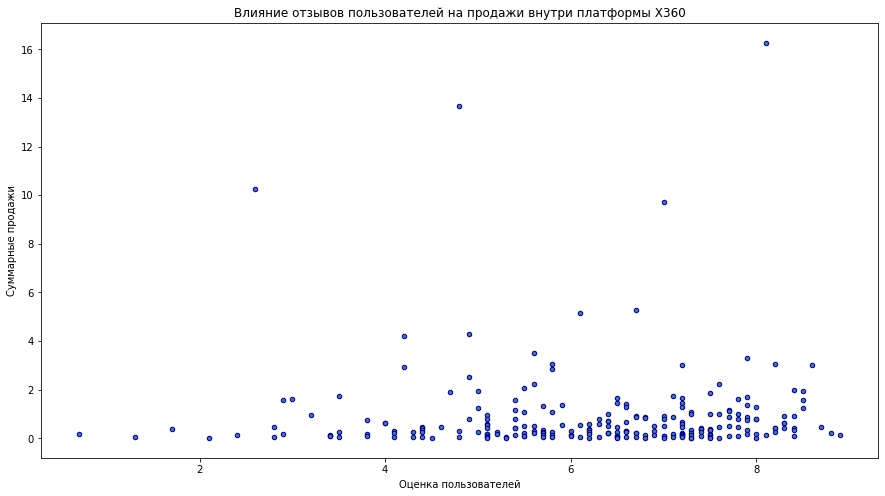

In [49]:
# Создание диаграммы рассеяния по Х360 по отзывам пользователей
df_x360 = new_df[(new_df['platform'] == 'X360') & (new_df['user_score'] > 0)]
df_x360.plot(kind='scatter', x='user_score', y='total_sales', ec='navy', figsize=(15,8))
plt.title('Влияние отзывов пользователей на продажи внутри платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

<b>Общие наблюдения:</b>
- С увеличением среднего рейтинга критиков увеличиваются и продажи платформы,
- С увеличением среднего рейтинга пользователей также увеличиваются продажи внутри одной платформы, однако заметного прироста в продажах не наблюдается,
- Обе диаграммы дают довольно большое количество выбросов,
- По-моему, крайне сомнительно использовать эти данные в реальности: рассеяние в обоих случаях настолько невелико, что утверждать факт того, что оценки как-то существенно влияют на продажи - не корректно. Посмотрим, что даст корреляция...

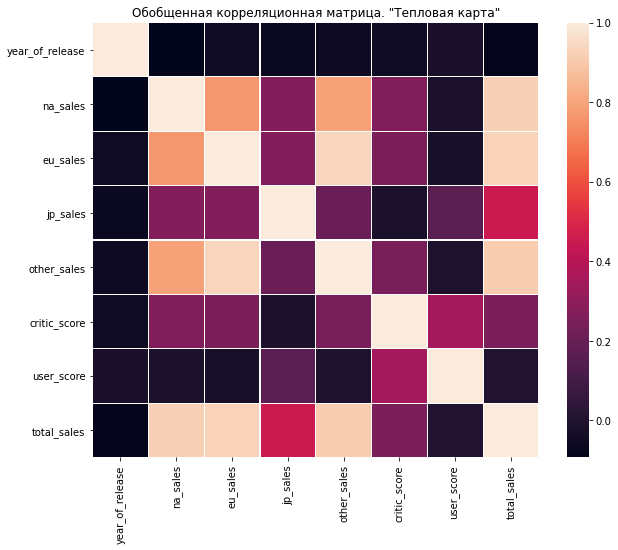

In [50]:
# Обобщенная корреляция (тепловая карта) по новому срезу
corr = new_df.corr()
plt.subplots(figsize=(10,8))
plt.title('Обобщенная корреляционная матрица. "Тепловая карта"')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.1)
plt.show()

In [51]:
# Формируем условие для корреляции по нововму срезу
new_df_selected=df_x360[['total_sales', 'critic_score', 'user_score']]

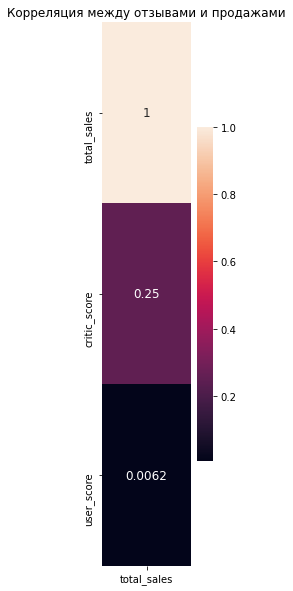

In [52]:
# Корреляция между отзывами и продажами
plt.figure(figsize=(2,10))
plt.title('Корреляция между отзывами и продажами')
sns.heatmap(new_df_selected.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
            annot=True, annot_kws={'size':12})
plt.show()

И в этом случае (по Х360) корреляция 'total_sales' - 'critic_score' все равно слабая.

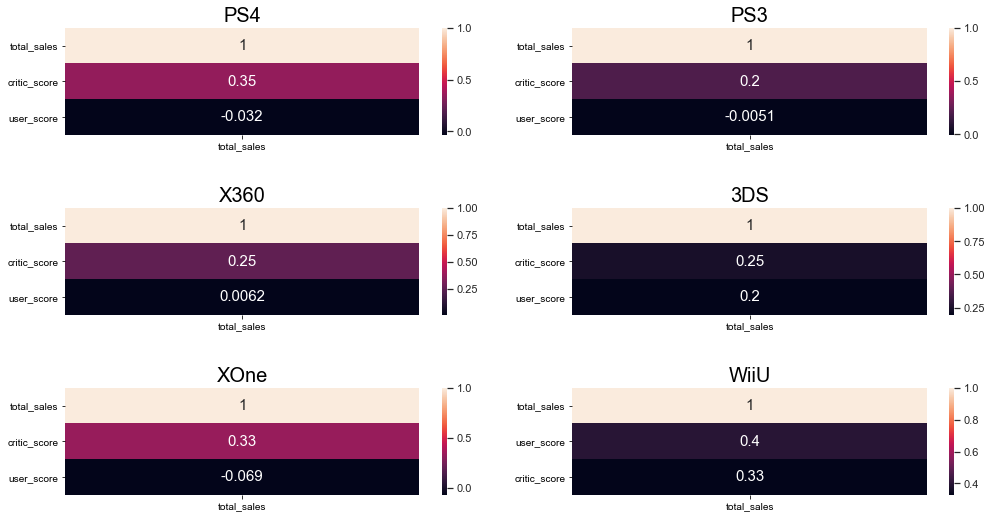

In [53]:
# Корреляции по ведущим платформам
top_platforms=['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8))
count = 0
for r in range(rows):
    for c in range(cols):
        act_platform = top_platforms[count]
        new_df_prep = new_df[(new_df['platform'] == act_platform) & (new_df['user_score'] >= 0)]
        
        new_df_selected = new_df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(new_df_selected.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                          annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(act_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

<b>Общие наблюдения:</b>
Корреляция 'total_sales' - 'critic_score' и корреляция 'total_sales' - 'user_score' слабая по всем платформам. При этом из общей картины выбивается платформа WiiU с корреляциями 0.4 и 0.33 соответственно. Это - самые "сильные" показатели корреляции из всех...

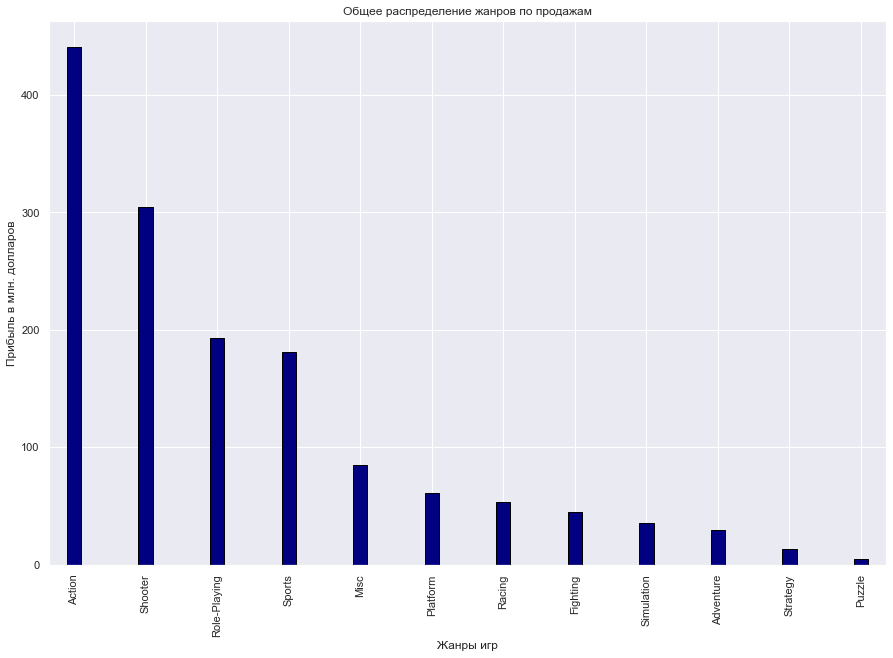

In [54]:
# Общее распределение жанров по продажам
new_df.groupby(by='genre').agg({'total_sales':'sum'})\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', figsize=(15,10), ec='black', width=0.2, color='navy', legend=False)
plt.title('Общее распределение жанров по продажам')
plt.xlabel('Жанры игр')
plt.ylabel('Прибыль в млн. долларов')
plt.show()

<b>Общие наблюдения:</b>
- С большим отрывом лидирует жанр Action,
- На втором месте Shooter, а потом Role-Playing и Sports,
- Минимальную прибыль приносят жанры Strategy и Puzzle. Это, на мой взгляд, весьма показательная тенденция: насколько я понимаю, начиная с 10х годов 21 века началось действительно бурное развитие мобильных игр, причем именно жанров Strategy и Puzzle. Получается, эти жанры ушли с игровых платформ в мобильный сектор...

### Формирование протрета пользователя

In [55]:
# Создаем функцию для вывода гистограмм
def regions_plot(groupby, region_sales, ax):
    pivot = new_df.groupby(groupby).agg({region_sales: 'sum'})\
    .sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Америке', 
                  'eu_sales': 'Продажи в Европе', 
                  'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': 'navy', 'eu_sales': 'orange', 
                  'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', 
                      title=title_dict[region_sales], ax=axes[ax], 
                      fontsize=18, color=color_dict[region_sales], 
                      rot=90)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.set_ylabel('')
    plot.title.set_size(20)
    plot.grid(None)
   

In [56]:
# Создаем функцию для отрисовки графиков
def new_analysis(col):
    regions_plot(col, 'na_sales', 0)
    regions_plot(col, 'eu_sales', 1)
    regions_plot(col, 'jp_sales', 2)

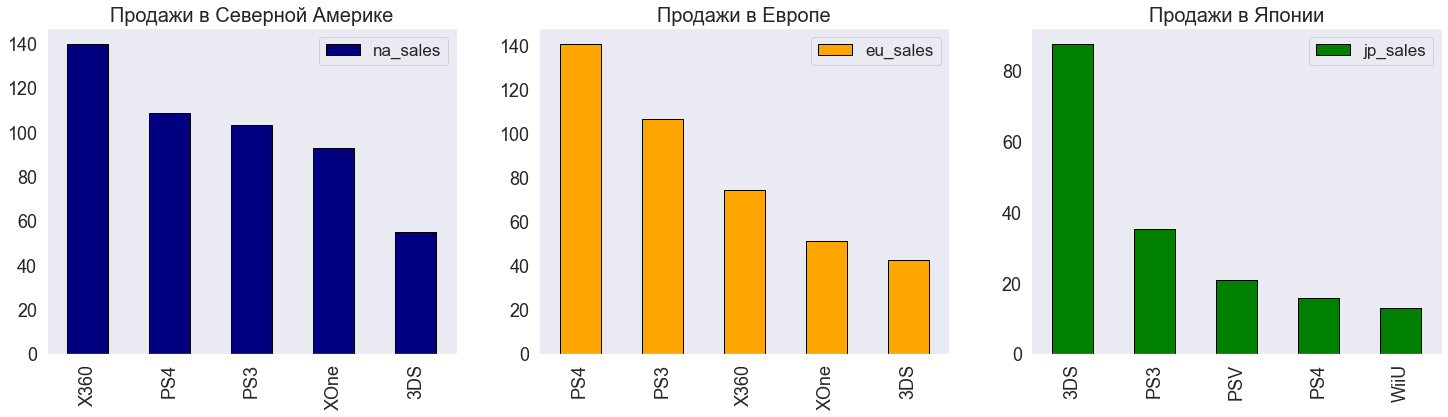

In [57]:
# Продажи платформ по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,6))
new_analysis('platform')

<b>Общие наблюдения:</b>
- Северная Америка: лидирует Х360, потом PS4,
- Европа: лидирует PS4, PS3 и только потом Х360,
- Япония: лидер продаж 3DS.

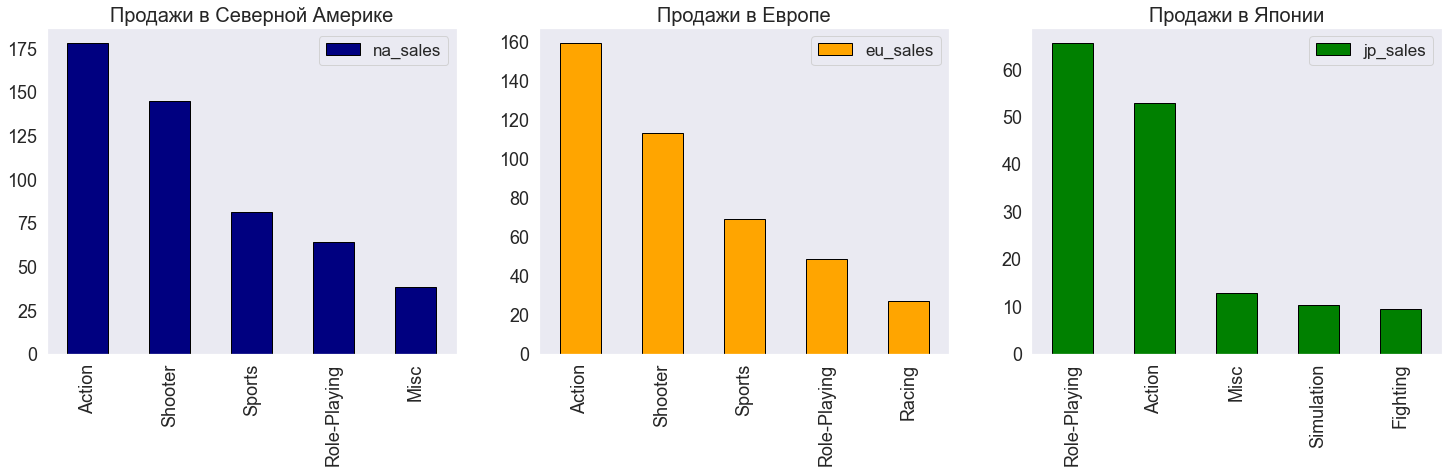

In [58]:
# Продажи жанров по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,6))
new_analysis('genre')

<b>Общие наблюдения:</b>
- В Северной Америке и Европе наиболее популярны жанры Action и Shooter,
- В Японии на первом месте по популярности жанр Role-Playing, на втором - Action.

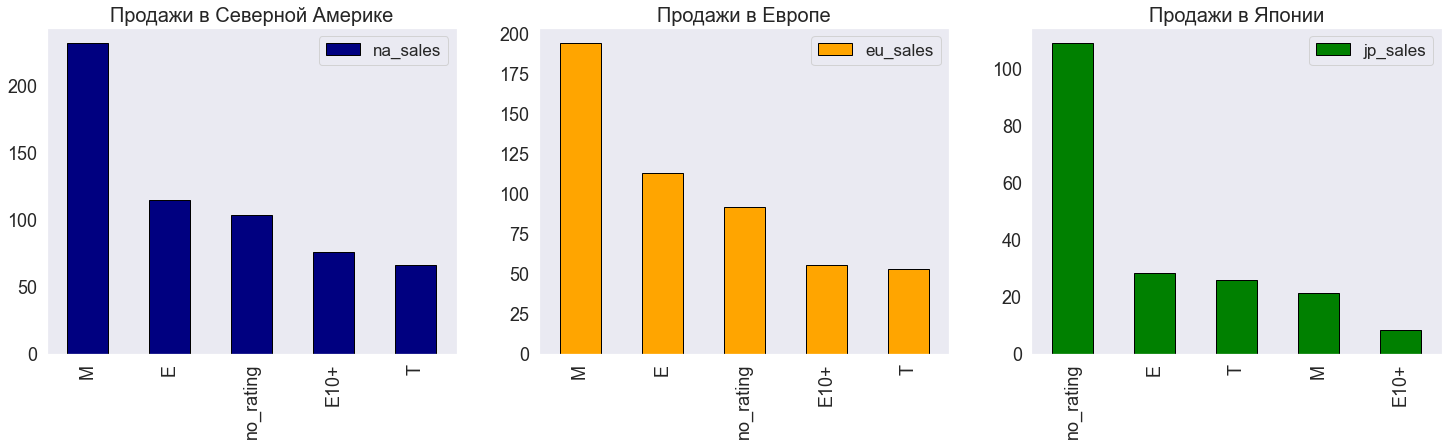

In [59]:
# Продажи по рейтингу
fig, axes = plt.subplots(1, 3, figsize=(25,6))
new_analysis('rating')

<b>Общие наблюдения:</b>
Если мы исходим из того, что существует несколько вариантов национальных (региональных) рейтингов, то получается, что данный анализ получается не совсем корректным... Если же ориентироваться исключительно на рейтинг ERSB, то картина следующая:
- Северная Америка и Европа: лидируют игры с рейтингом "М" (старше 17 лет),
- Япония: лидируют игры с неустановленным (по версии ERSB) рейтингом.

___

<b>Промежуточный вывод:</b>
- Исходя из данного среза, наибольшей популярностью пользуются платформы Х360, PS4, PS3, 3DS,
- Несмотря на положительные значения, корреляцию по 'total_sales' - 'critic_score' нельзя назвать значимой (слабая корреляция) и, следовательно, утверждать, что отзывы критиков как-то существенно влияют на продажи платформ не совсем корректно,
- Судя по всему, работает прямая причинно-следственная связь: чем новей (актуальней) платформа, тем лучше она продается, а отзывы критиков лишь добавляют ей популярности, но не являются критически значимыми. Та же закономерность работает и с отзывами пользователей,
- По всем регионам популярностью пользуется жанр Action, который занимает первое и второе место. Кроме того, популярностью пользуются жанры 'Shooter' (для Северной Америки и Европы - второе место) и 'Role-Playing' (для Японии - первое место),
- Игры с рейтингом "Старше 17 лет" согласно версии ERSB лидируют в Северной Америке и Европе. Игры с неопределенным рейтингом (опять же, согласно ERSB), лидируют в Японии.

## Проверка гипотез

<span style=color:red><b>ВАЖНО:</b></span> поскольку выборки независимы, для проверки гипотезы можно использвать t-критерий Стьюдента.

<span style=color:red><b>ВАЖНО:</b></span> необходимо определить значения параметра equal_var. Если дисперсии равны, параметр equal_var - True, если нет - False. 

<span style=color:red><b>ВАЖНО:</b></span> Пороговое значение alpha принимаем за  = .05 

### **Формулировка и проверка гипотезы 1**
- <b>НУЛЕВАЯ ГИПОТЕЗА:</b> Средние пользовательские рейтинги платформ Xbox One и PC <b>НЕ РАЗЛИЧАЮТСЯ</b>
- <b>АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА:</b> Средние пользовательские рейтинги платформ Xbox One и PC <b>РАЗЛИЧАЮТСЯ</b>

In [60]:
# Присваиваем значения
XOne = df[(df['platform'] == 'XOne') & (df['user_score'] >= 0)]['user_score']
PC = df[(df['platform'] == 'PC') & (df['user_score'] >= 0)]['user_score']

In [61]:
# Оцениваем дисперсию выборки
np.var(XOne)

1.8965188383045533

In [62]:
# Оцениваем дисперсию выборки
np.var(PC)

2.3461128196131775

<span style=color:red>Значения дисперсий выборок различаются, применяем equal_var=False</span>

In [63]:
alpha= .05

In [64]:
# Функция для проведения статистического анализа
def ttest (data1, data2, alpha):
    results = st.ttest_ind(data1, data2, equal_var=False)
    print('p-value', results.pvalue)
    
    if (results.pvalue<alpha):
        print('Нулевая гипотеза не работает')
    else:
        print('Нулевая гипотеза работает')

In [65]:
ttest(XOne, PC, alpha)

p-value 4.5385802963771776e-06
Нулевая гипотеза не работает


### **Промежуточный вывод:**
Нулевая гипотеза не работает. Средние пользовательские рейтинги платформ Xbox One и PC <span style=color:red><b>РАЗЛИЧАЮТСЯ</b></span>

___

### **Формулировка и проверка гипотезы 2**
- <b>НУЛЕВАЯ ГИПОТЕЗА:</b> Средние пользовательские рейтинги жанров Action и Sports <b>НЕ РАЗЛИЧАЮТСЯ</b>
- <b>АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА:</b> Средние пользовательские рейтинги жанров Action и Sports <b>РАЗЛИЧАЮТСЯ</b>

In [66]:
# Присваиваем значения
Action = df[(df['genre'] == 'Action') & (df['user_score'] >= 0)]['user_score']
Sports = df[(df['genre'] == 'Sports') & (df['user_score'] >= 0)]['user_score']

In [67]:
# Оцениваем дисперсию выборки
np.var(Action)

2.026364874182167

In [68]:
# Оцениваем дисперсию выборки
np.var(Sports)

2.6206293039045394

<span style=color:red>Значения дисперсий выборок различаются, применяем equal_var=False</span>

In [69]:
alpha= .05

In [70]:
ttest(Action, Sports, alpha)

p-value 0.07370217419278534
Нулевая гипотеза работает


### **Промежуточный вывод:**
Нулевая гипотеза работает. Средние пользовательские рейтинги жанров Action и Sports <span style=color:red><b>НЕ РАЗЛИЧАЮТСЯ</b></span>

___

## Общий вывод

- Начиная с 2012 года рынок игровых платформ неуклонно сокращается. Это связано, в первую очередь, с развитием мобильных игр,
- Основное влияние на суммарные продажи платформ оказывает мнение критиков, а не рейтинг, составленный пользователями,
- Глобально, наибольшей популярностью пользуются игры в жанрах Action и Shooter. В Японии наиболее популярен жанр ролевых игр, за ним следуют Action,
- В Северной Америке и Европе игры для подростоков и лиц старше 17 лет наиболее востребованы, в Японии максимально популярны игры с неустановленным рейтингов,
- Наибольшую прибыль создателям приносят игры в жанрах Action и Shooter. При этом разработка такого рода игр требует больших финансовых вложений,
- Рынок Азии, в целом, и Японии, в частности, отличается традиционным своеобразием: это выражается и в доминировании платформы 3DS на рынке Японии, а также большим количеством платформ, производимых исключительно для локальных азиатских рынков,
- Можно с высокой долей уверенности констатировать тот факт, что рынок игровых платформ заканчивает очередной цикл развития. Будущее рынка видится в развитии технологий AV/VR, а также полном масштабировании игр и их адаптации к любому типу платформы и устройства (консоль, компьютер, планшет, смартфон).